In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("clean_data.csv")

In [5]:
df.shape

(69569, 30)

In [6]:
df.tail(30)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
69539,160248038,Caucasian,Male,45,1,1,7,3,missing,62,...,>8,No,No,No,No,No,Down,Ch,Yes,0
69540,109990548,Caucasian,Female,75,1,2,7,1,missing,1,...,>8,No,No,No,No,No,Steady,No,Yes,0
69541,93806559,Other,Male,75,2,3,7,8,high_freq,67,...,NaN,No,No,No,No,No,Down,Ch,Yes,0
69542,182499863,Caucasian,Male,55,1,3,7,9,missing,81,...,Norm,No,No,No,No,No,Steady,No,Yes,0
69543,99489339,Caucasian,Female,75,1,1,7,2,missing,48,...,NaN,No,No,No,No,No,Steady,No,Yes,0
69544,162949523,Caucasian,Male,15,1,7,7,1,high_freq,59,...,NaN,No,No,No,No,No,Up,Ch,Yes,0
69545,180189752,Caucasian,Male,55,2,1,7,5,high_freq,71,...,>7,No,No,No,Steady,No,Down,Ch,Yes,0
69546,106722468,Caucasian,Female,75,1,3,7,6,missing,40,...,NaN,No,No,No,No,No,Up,Ch,Yes,0
69547,40181832,Caucasian,Female,75,1,1,7,3,missing,58,...,NaN,No,No,No,Steady,No,Up,Ch,Yes,0
69548,98476776,Caucasian,Male,65,3,6,1,3,missing,41,...,NaN,Steady,No,No,No,No,No,No,Yes,0


<function matplotlib.pyplot.show(close=None, block=None)>

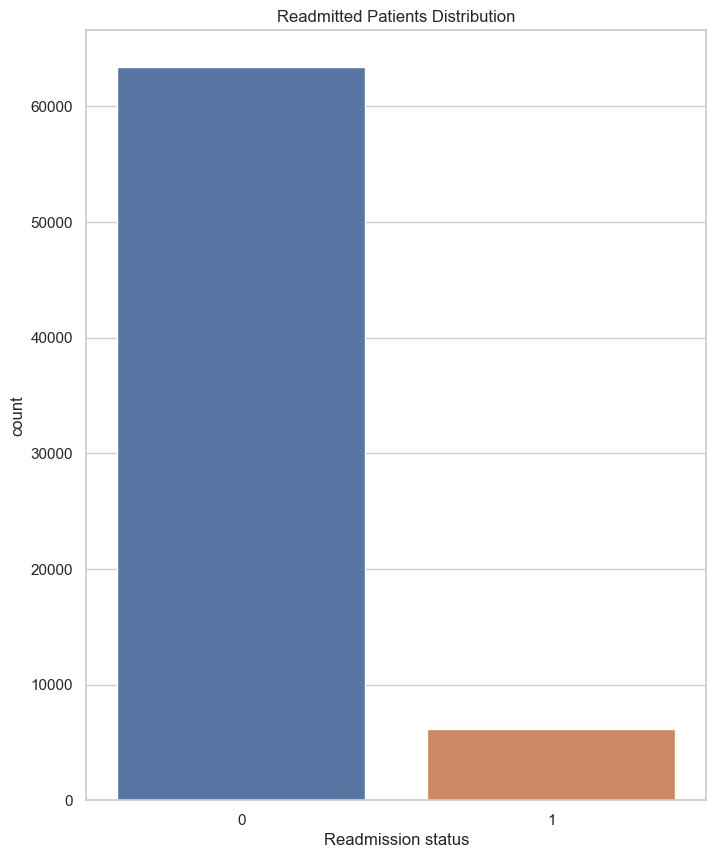

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,10))
sns.countplot(data=df,x='readmitted')
plt.title('Readmitted Patients Distribution')
plt.xlabel('Readmission status')
plt.ylabel('count')
plt.show

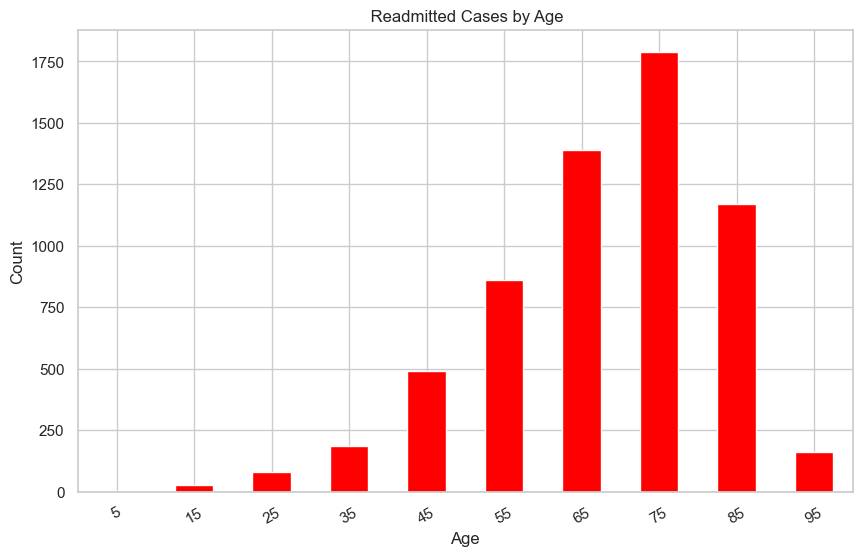

In [8]:
readmitted_df = df[df['readmitted'] == 1]

# Grouping by age and count of readmitted cases
age_readmitted_counts = readmitted_df['age'].value_counts().sort_index()

# Plotting
age_readmitted_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title(' Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [9]:
print("Readmitted Cases by Age:")
print(age_readmitted_counts)

Readmitted Cases by Age:
age
5        3
15      26
25      81
35     186
45     491
55     859
65    1387
75    1789
85    1168
95     162
Name: count, dtype: int64


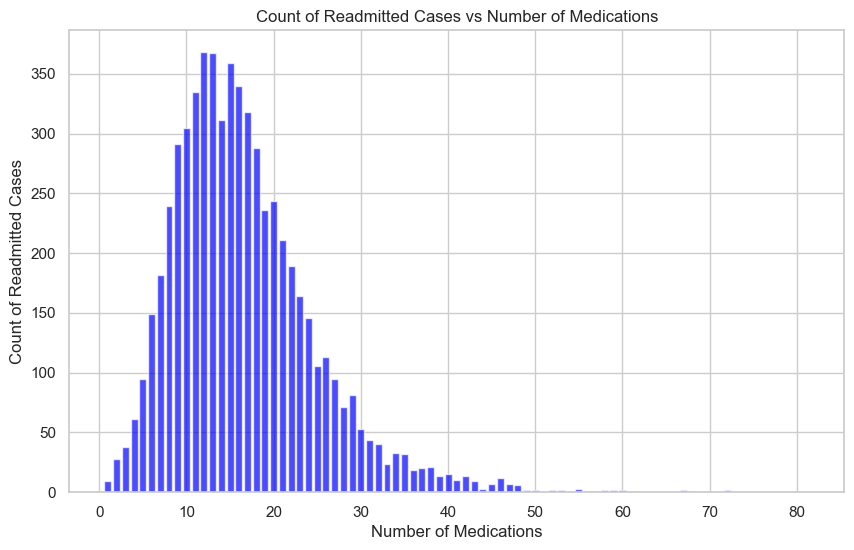

In [11]:


# Filtering data for cases where 'readmitted' is 'Yes'
readmitted_df = df[df['readmitted'] == 1]

# Grouping by number of medications and counting occurrences
medication_counts = readmitted_df['num_medications'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(medication_counts.index, medication_counts.values, color='blue', alpha=0.7)
plt.xlabel('Number of Medications')
plt.ylabel('Count of Readmitted Cases')
plt.title('Count of Readmitted Cases vs Number of Medications')
plt.grid(True)
plt.show()

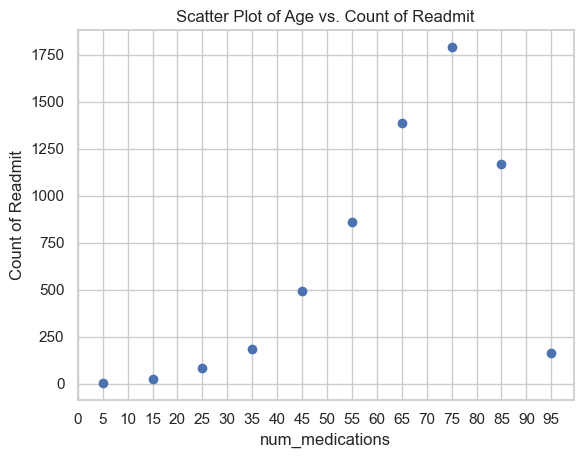

In [12]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['age'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Age vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()


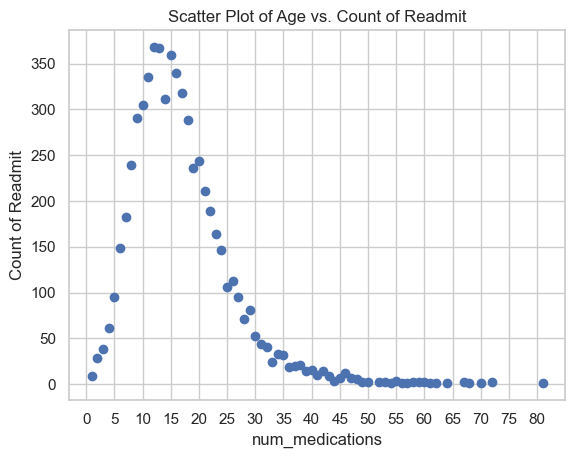

In [13]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['num_medications'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Age vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()

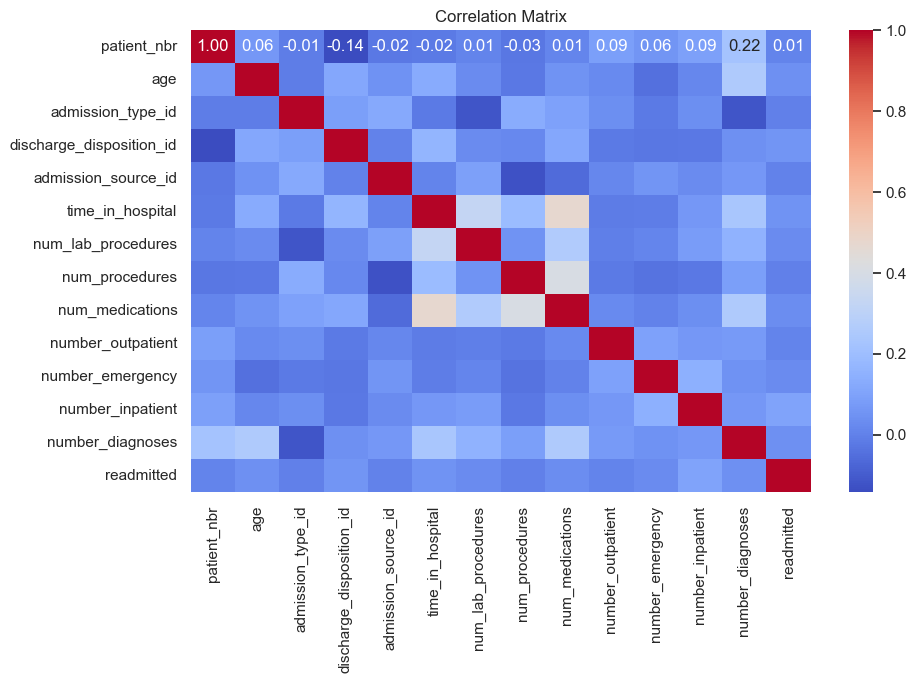

In [15]:
num_df = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()